<table>
    <tr>
        <td>&nbsp;</td>
        <td>
            <table><tr>
            <tp>
                <h1 style="color:blue;text-align:center">Inteligencia Artificial Mini Proyecto 3</h1
            </tp>
            <tp>
                <p style="font-size:150%;text-align:center">Ejercicio 3</p></tp>
            </tr></table>
        </td>
    </tr>
</table>

---

# Dependencias

Al iniciar el notebook o reiniciar el kerner se pueden cargar todas las dependencias de este notebook corriendo las siguientes celdas. Este también es el lugar para instalar las dependencias que podrían hacer falta.

**De Python:**

In [1]:
# En linux o mac
#!pip3 install -r requirements.txt
#!pip install 'gymnasium[toy-text]'
#!pip install termcolor
#!pip install moviepy
# En windows
#!python -m pip install -r requirements.txt
#!python -m pip installgymnasium[toy-text]

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from termcolor import colored, cprint
import gymnasium as gym
from gymnasium.envs.toy_text.frozen_lake import generate_random_map
from gymnasium.wrappers import TimeLimit
import pygame
import pygame.surfarray

/Users/nataliacabrera/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


**Del notebook:**

In [2]:
from ambientes import *
from agents import *
from algoritmos import *
from utils import Episode, Experiment,gym_interpreter1
from plot_utils import PlotGridValues, Plot
from tests import *

In [3]:
class SARSA(Agent) :
    '''
    Implements a SARSA learning rule.
    '''

    def __init__(self, parameters:dict):
        super().__init__(parameters)
        self.alpha = self.parameters['alpha']
        self.debug = False
   
    def update(self, next_state, reward, done):
        '''
        Agent updates its model.
        '''
        # obtain previous state
        state = self.states[-1]
        # obtain previous action
        action = self.actions[-1]
        # Get next_action
        next_action = self.make_decision()
        # Find bootstrap
        estimate = reward + self.gamma*self.Q[next_state, next_action] # recompensa más descuento por valor del siguiente estado
        # Obtain delta
        delta = estimate - self.Q[state, action]  # Diferencia temporal: estimado menos valor del estado actual
        # Update Q value
        prev_Q = self.Q[state, action]
        self.Q[state, action] = prev_Q + self.alpha*(delta) # Actualizar en la dirección de delta por una fracción alfa
        # Update policy
        self.update_policy(state)
        if self.debug:
            print('')
            print(dash_line)
            print(f'Learning log:')
            print(f'state:{state}')
            print(f'action:{action}')
            print(f'reward:{reward}')
            print(f'estimate:{estimate}')
            print(f'Previous Q:{prev_Q}')
            print(f'delta:{delta}')
            print(f'New Q:{self.Q[state, action]}')


In [4]:
class Q_learning(Agent) :
    '''
    Implements a Q-learning rule.
    '''

    def __init__(self, parameters:dict):
        super().__init__(parameters)
        self.alpha = self.parameters['alpha']
        self.debug = False
   
    def update(self, next_state, reward, done):
        '''
        Agent updates its model.
        '''
        # obtain previous state
        state = self.states[-1] # Aquí estado previo
        # obtain previous action
        action = self.actions[-1]
        # Find bootstrap
        maxQ = self.max_Q(next_state) 
        estimate = reward + self.gamma*maxQ # Calcula el estimado
        # Obtain delta
        delta = estimate - self.Q[state,action] # Calcula el delta
        # Update Q value
        prev_Q = self.Q[state, action]
        self.Q[state, action] = prev_Q + self.alpha*(delta) # Actualiza el valor
        # Update policy
        self.update_policy(state) # Actualizar la política en el estado        
        if self.debug:
            print('')
            print(dash_line)
            print(f'Learning log:')
            print(f'state:{state}')
            print(f'action:{action}')
            print(f'reward:{reward}')
            print(f'estimate:{estimate}')
            print(f'Previous Q:{prev_Q}')
            print(f'delta:{delta}')
            print(f'New Q:{self.Q[state, action]}') 

## Ejercicio 3 <a class="anchor" id="ej1"></a>

In [5]:
size = 500

# Create environment
env = gym.make('Taxi-v3',
               render_mode='rgb_array'
              )
# Create agent
parameters = {
    "nS": size,\
    "nA": env.action_space.n,\
    "gamma":0.8,\
    'epsilon': 0.1,\
    'alpha': 0.1,\
}
agent_q = Q_learning(parameters=parameters)
agent = Agent(parameters=parameters)

Running simulations:   0%|          | 0/1 [00:00<?, ?it/s]

	Running episodes:   0%|          | 0/1000 [00:00<?, ?it/s]

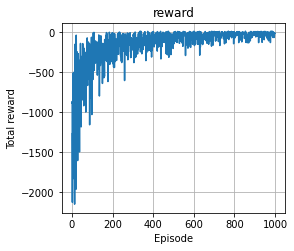

In [6]:

#Create experiment
experiment = Experiment(environment=env,\
                        env_name='Taxi', \
                        num_rounds=900, \
                        num_episodes=1000, \
                        num_simulations=1,\
                        state_interpreter=gym_interpreter1)

# Train agent
agents = experiment.run_experiment(agents=[agent_q],\
                                  names=['Q_learning'], \
                                  measures=['reward'], \
                                  learn=True)

In [7]:
print(dir(env))

['__annotations__', '__class__', '__class_getitem__', '__delattr__', '__dict__', '__dir__', '__doc__', '__enter__', '__eq__', '__exit__', '__format__', '__ge__', '__getattr__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__orig_bases__', '__parameters__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__slotnames__', '__slots__', '__str__', '__subclasshook__', '__weakref__', '_action_space', '_cached_spec', '_elapsed_steps', '_is_protocol', '_max_episode_steps', '_metadata', '_np_random', '_observation_space', '_reward_range', '_saved_kwargs', 'action_space', 'class_name', 'close', 'env', 'get_wrapper_attr', 'metadata', 'np_random', 'observation_space', 'render', 'render_mode', 'reset', 'reward_range', 'spec', 'step', 'unwrapped', 'wrapper_spec']


In [8]:
setattr(env, 'nS', 500)

In [9]:
# Shut down exploration
agents[0].epsilon = 0
for s in range(env.nS):
    agents[0].update_policy(s)

Running simulations:   0%|          | 0/1 [00:00<?, ?it/s]

	Running episodes:   0%|          | 0/10 [00:00<?, ?it/s]

Average sum of rewards:
 model
Random   -0.5
Name: reward, dtype: float64

Episode termination percentage:
 model
Random    40.0
Name: done, dtype: float64


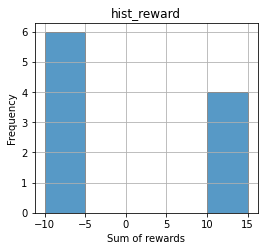

In [24]:
# Create experiment
experiment = Experiment(environment=env,\
                        env_name='Taxi', \
                        num_rounds=10, \
                        num_episodes=10, \
                        num_simulations=1,\
                        state_interpreter=gym_interpreter1)
# Test agent already trained
agents = experiment.run_experiment(agents=agents,\
                                  names=['Random'], \
                                  measures=['hist_reward'], \
                                  learn=False)

Moviepy - Building video /Users/nataliacabrera/Downloads/Diferencia temporal-20231123/Taxi/rl-video-episode-0.mp4.
Moviepy - Writing video /Users/nataliacabrera/Downloads/Diferencia temporal-20231123/Taxi/rl-video-episode-0.mp4



Moviepy - Done !
Moviepy - video ready /Users/nataliacabrera/Downloads/Diferencia temporal-20231123/Taxi/rl-video-episode-0.mp4


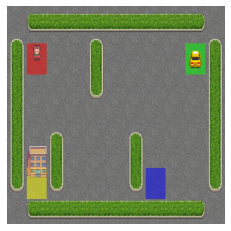

In [27]:
max_rounds=50
# Create episode
episodio = Episode(environment=env,\
                   env_name='Taxi-v3',\
                   agent=agent,\
                   model_name='Random',\
                   num_rounds=max_rounds, \
                   state_interpreter=gym_interpreter1)
# Visualize
episodio.renderize(to_video=True, file='Taxi')

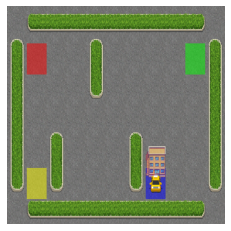

Moviepy - Building video /Users/nataliacabrera/Downloads/Diferencia temporal-20231123/Taxi/rl-video-episode-0.mp4.
Moviepy - Writing video /Users/nataliacabrera/Downloads/Diferencia temporal-20231123/Taxi/rl-video-episode-0.mp4



Moviepy - Done !
Moviepy - video ready /Users/nataliacabrera/Downloads/Diferencia temporal-20231123/Taxi/rl-video-episode-0.mp4


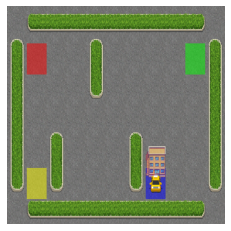

In [28]:
max_rounds=50
# Create episode
episodio = Episode(environment=env,\
                   env_name='Taxi-v3',\
                   agent=agents[0],\
                   model_name='Random',\
                   num_rounds=max_rounds, \
                   state_interpreter=gym_interpreter1)
# Visualize
episodio.renderize(to_video=True, file='Taxi')